In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('default')
sns.set_palette("husl")

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Load the dataset
df = pd.read_csv("abfss://c992bf4c-a2f7-44d1-aa60-7a81d98211ce@onelake.dfs.fabric.microsoft.com/425f2eaf-c2c7-4452-8c40-2c2f8a44cd62/Files/urban_planning_dataset.csv")
# df now is a Spark DataFrame containing CSV data from "abfss://c992bf4c-a2f7-44d1-aa60-7a81d98211ce@onelake.dfs.fabric.microsoft.com/425f2eaf-c2c7-4452-8c40-2c2f8a44cd62/Files/urban_planning_dataset.csv".

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
df.head()

StatementMeta(, c196e2a1-0cd6-4216-a071-a768c1c0cbf3, 4, Finished, Available, Finished)

Dataset shape: (3476, 16)

Columns: ['building_density', 'road_connectivity', 'public_transport_access', 'air_quality_index', 'green_cover_percentage', 'carbon_footprint', 'population_density', 'crime_rate', 'avg_income', 'renewable_energy_usage', 'disaster_risk_index', 'land_use_type_Commercial', 'land_use_type_Green Space', 'land_use_type_Industrial', 'land_use_type_Residential', 'urban_sustainability_score']


,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


In [3]:
# Check for missing values and data types
print("Missing values:")
print(df.isnull().sum())
print(f"\nData types:\n{df.dtypes}")

# Basic statistics
df.describe()

StatementMeta(, c196e2a1-0cd6-4216-a071-a768c1c0cbf3, 5, Finished, Available, Finished)

Missing values:
building_density              0
road_connectivity             0
public_transport_access       0
air_quality_index             0
green_cover_percentage        0
carbon_footprint              0
population_density            0
crime_rate                    0
avg_income                    0
renewable_energy_usage        0
disaster_risk_index           0
land_use_type_Commercial      0
land_use_type_Green Space     0
land_use_type_Industrial      0
land_use_type_Residential     0
urban_sustainability_score    0
dtype: int64

Data types:
building_density              float64
road_connectivity             float64
public_transport_access       float64
air_quality_index             float64
green_cover_percentage        float64
carbon_footprint              float64
population_density            float64
crime_rate                    float64
avg_income                    float64
renewable_energy_usage        float64
disaster_risk_index           float64
land_use_type_Commercial    

,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
count,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000
mean,0.496345,0.490205,0.501397,0.494445,0.505579,0.509657,0.502158,0.499659,0.491556,0.499881,0.494002,0.252301,0.246835,0.241945,0.258918,0.482871
std,0.287770,0.287484,0.287163,0.287185,0.288395,0.288139,0.286912,0.284553,0.285484,0.290146,0.287720,0.434396,0.431232,0.428323,0.438104,0.169391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249740,0.241686,0.256093,0.246493,0.256761,0.269287,0.254415,0.255697,0.242244,0.245107,0.243494,0.000000,0.000000,0.000000,0.000000,0.360202
50%,0.495439,0.483176,0.499168,0.488978,0.513606,0.507030,0.505622,0.499045,0.496457,0.498264,0.493688,0.000000,0.000000,0.000000,0.000000,0.482517
75%,0.745671,0.734190,0.752051,0.745491,0.757637,0.755210,0.750379,0.739293,0.730656,0.752263,0.739163,1.000000,0.000000,0.000000,1.000000,0.606625
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Create land use type column from dummy variables
land_use_cols = ['land_use_type_Commercial', 'land_use_type_Green Space', 'land_use_type_Industrial', 'land_use_type_Residential']
df['land_use_type'] = df[land_use_cols].idxmax(axis=1).str.replace('land_use_type_', '')

# Create meaningful column aliases
df_clean = df.rename(columns={
    'green_cover_percentage': 'green_area_pct',
    'population_density': 'urban_density',
    'public_transport_access': 'transport_score',
    'renewable_energy_usage': 'renewable_energy_index',
    'air_quality_index': 'pollution_index',
    'urban_sustainability_score': 'livability_index'
})

print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Land use distribution:\n{df_clean['land_use_type'].value_counts()}")

StatementMeta(, c196e2a1-0cd6-4216-a071-a768c1c0cbf3, 6, Finished, Available, Finished)

Cleaned dataset shape: (3476, 17)
Land use distribution:
land_use_type
Residential    900
Commercial     877
Green Space    858
Industrial     841
Name: count, dtype: int64


StatementMeta(, c196e2a1-0cd6-4216-a071-a768c1c0cbf3, 7, Finished, Available, Finished)

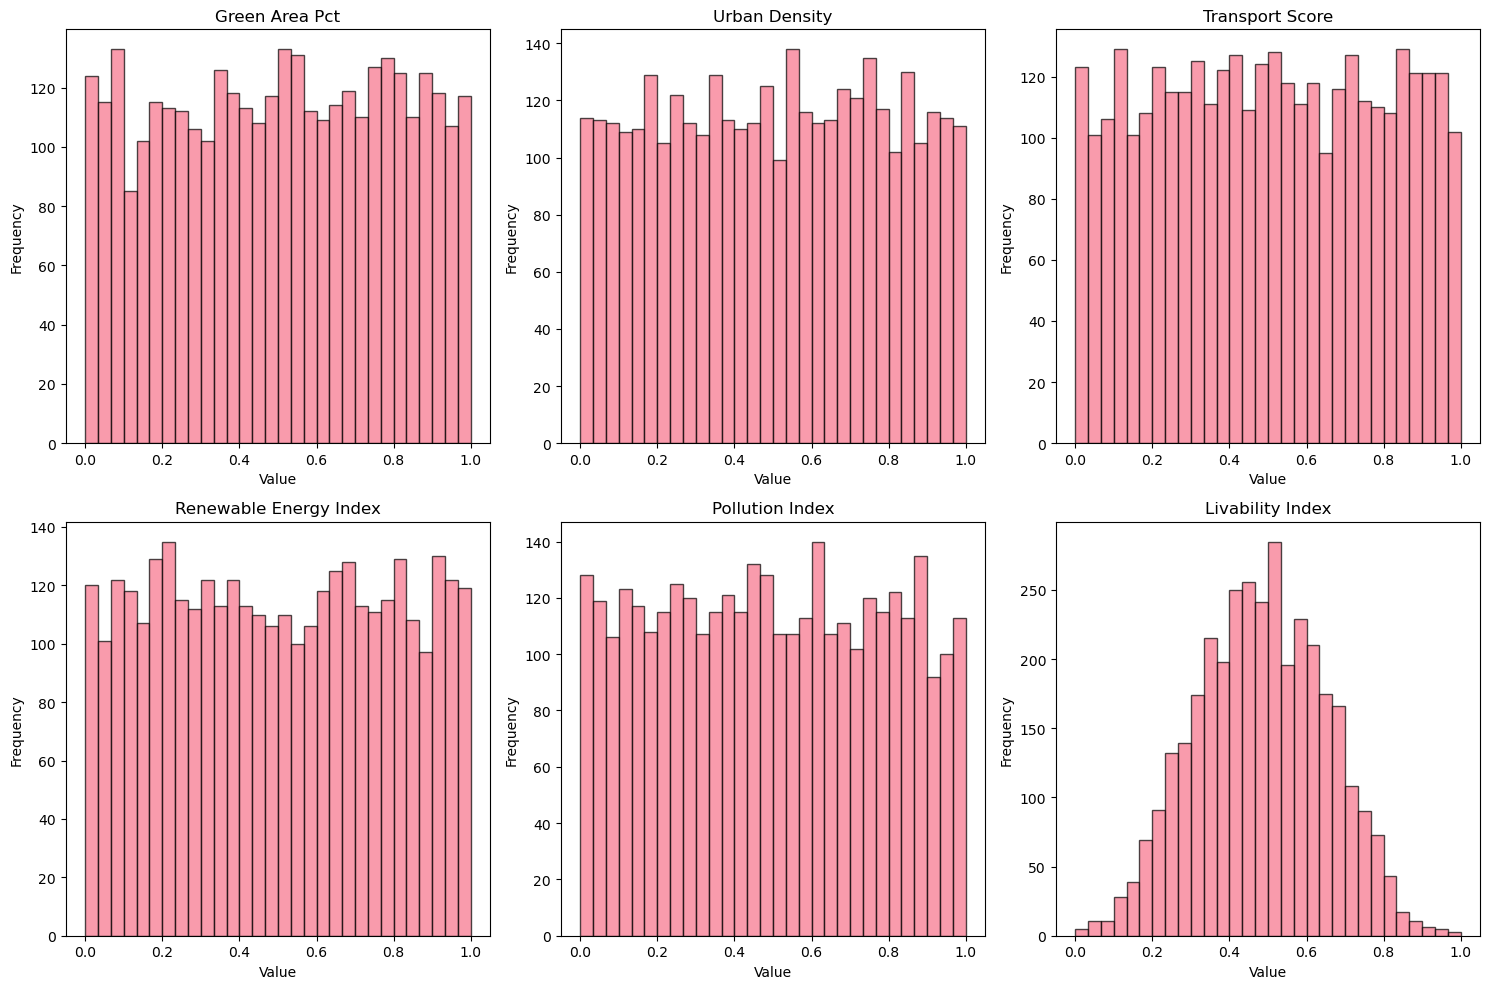

In [5]:
# Key sustainability metrics
key_metrics = ['green_area_pct', 'urban_density', 'transport_score', 'renewable_energy_index', 'pollution_index', 'livability_index']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, metric in enumerate(key_metrics):
    axes[i].hist(df_clean[metric], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{metric.replace("_", " ").title()}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

StatementMeta(, c196e2a1-0cd6-4216-a071-a768c1c0cbf3, 12, Finished, Available, Finished)

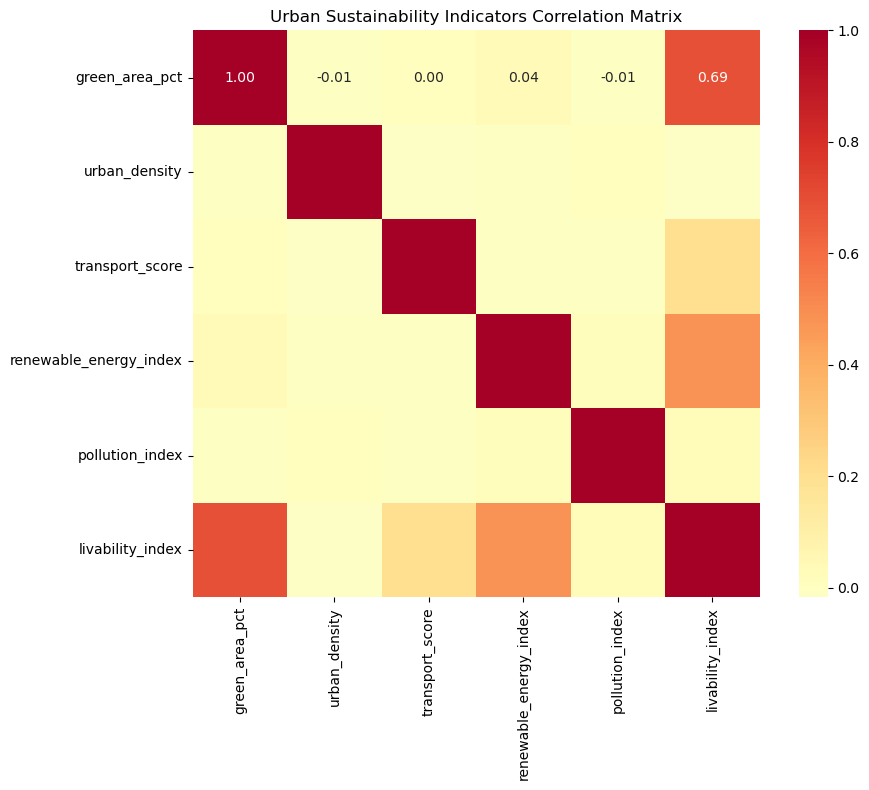

Correlations with Livability Index:
livability_index          1.000000
green_area_pct            0.690025
renewable_energy_index    0.481232
transport_score           0.203036
pollution_index           0.018695
urban_density            -0.017371
Name: livability_index, dtype: float64


In [10]:
# Correlation matrix for key metrics
correlation_matrix = df_clean[key_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f')
plt.title('Urban Sustainability Indicators Correlation Matrix')
plt.tight_layout()
plt.show()

# Key correlations with livability
livability_corr = correlation_matrix['livability_index'].sort_values(ascending=False)
print("Correlations with Livability Index:")
print(livability_corr)

In [11]:
df

StatementMeta(, c196e2a1-0cd6-4216-a071-a768c1c0cbf3, 13, Finished, Available, Finished)

,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score,land_use_type
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239,Industrial
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923,Green Space
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844,Residential
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002,Industrial
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376,Industrial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,0.180728,0.585702,0.628368,0.707415,0.919950,0.671551,0.044702,0.851829,0.860577,0.025622,0.896746,0.0,0.0,1.0,0.0,0.380806,Industrial
3472,0.948105,0.315659,0.547392,0.789579,0.530332,0.175460,0.724890,0.235485,0.749599,0.259946,0.067854,1.0,0.0,0.0,0.0,0.620052,Commercial
3473,0.218859,0.086766,0.231211,0.000000,0.396619,0.918116,0.874793,0.599927,0.353556,0.916013,0.099327,0.0,1.0,0.0,0.0,0.497869,Green Space
3474,0.326357,0.222883,0.343900,0.537074,0.534952,0.245087,0.167150,0.856336,0.682046,0.668290,0.245095,0.0,0.0,0.0,1.0,0.572259,Residential
